# Лабораторная работа №5. Визуализация данных

In [51]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Matplotlib version: {mpl.__version__}")

%matplotlib inline

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Numpy version: 2.0.2
Matplotlib version: 3.10.0


Задача **1**

Постройте два линейных графика функции $y=\frac{2}{x}+3$ на одной оси координат, первый для диапазона x=[-10;0], а второй для x=[0;7].

* Графики должны быть помещены на оси с пределами xlim(-10, 10) и ylim(-10, 10), иметь подписи к осям, легенду и заголовок.
* Первый график должен быть красного цвета и нарисован штрихпунктирной линией
* Второй график должен иметь цвет (1.0,0.2,0.3) и нарисован сплошной линией


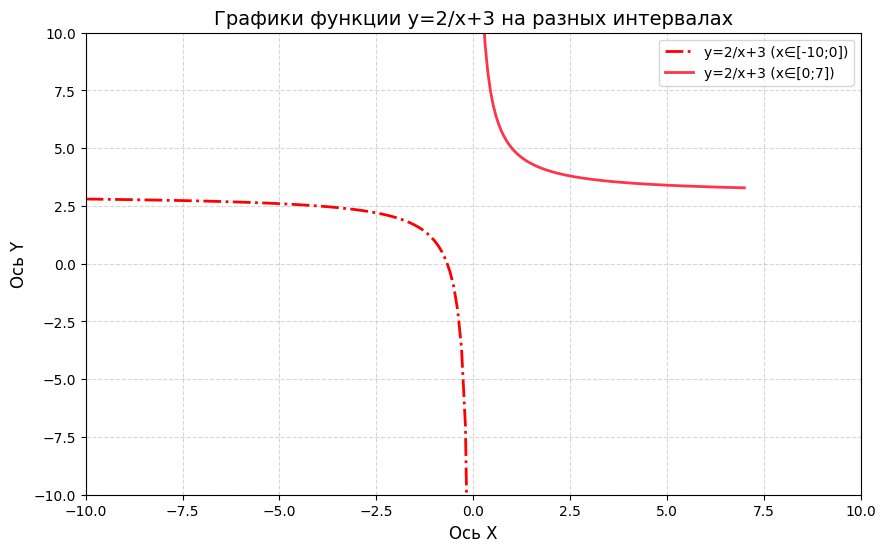

In [52]:
# Создаем фигуру и оси
plt.figure(figsize=(10, 6))

# Первый график для x=[-10;0] - исключаем 0, так как на 0 функция не определена
x1 = np.linspace(-10, -0.1, 100)  # Исключаем 0
y1 = 2/x1 + 3
plt.plot(x1, y1, color='red', linestyle='-.', linewidth=2, label='y=2/x+3 (x∈[-10;0])')

# Второй график для x=[0;7] - исключаем 0, так как на 0 функция не определена
x2 = np.linspace(0.1, 7, 100)  # Исключаем 0
y2 = 2/x2 + 3
plt.plot(x2, y2, color=(1.0, 0.2, 0.3), linestyle='-', linewidth=2, label='y=2/x+3 (x∈[0;7])')

# Настраиваем оси
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# Добавляем подписи и оформление
plt.xlabel('Ось X', fontsize=12)
plt.ylabel('Ось Y', fontsize=12)
plt.title('Графики функции y=2/x+3 на разных интервалах', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

# Показываем график
plt.show()

Задача **2**

Постройте диаграмму рассеяния для набора данных titanic (файл ./data/titanic.csv).

* По оси X - возврат пассажира (Age)
* По оси Y - стоимость билета (Fare)
* Для выживших пассажиров используется маркер зеленый круг (Survived)
* Для не выживших пассажиров используется маркер красный крест (Survived)
* График должен подписи к осям и легенду и заголовок

Данные для которых не указан возврат или стоимость билета должны быть исключены

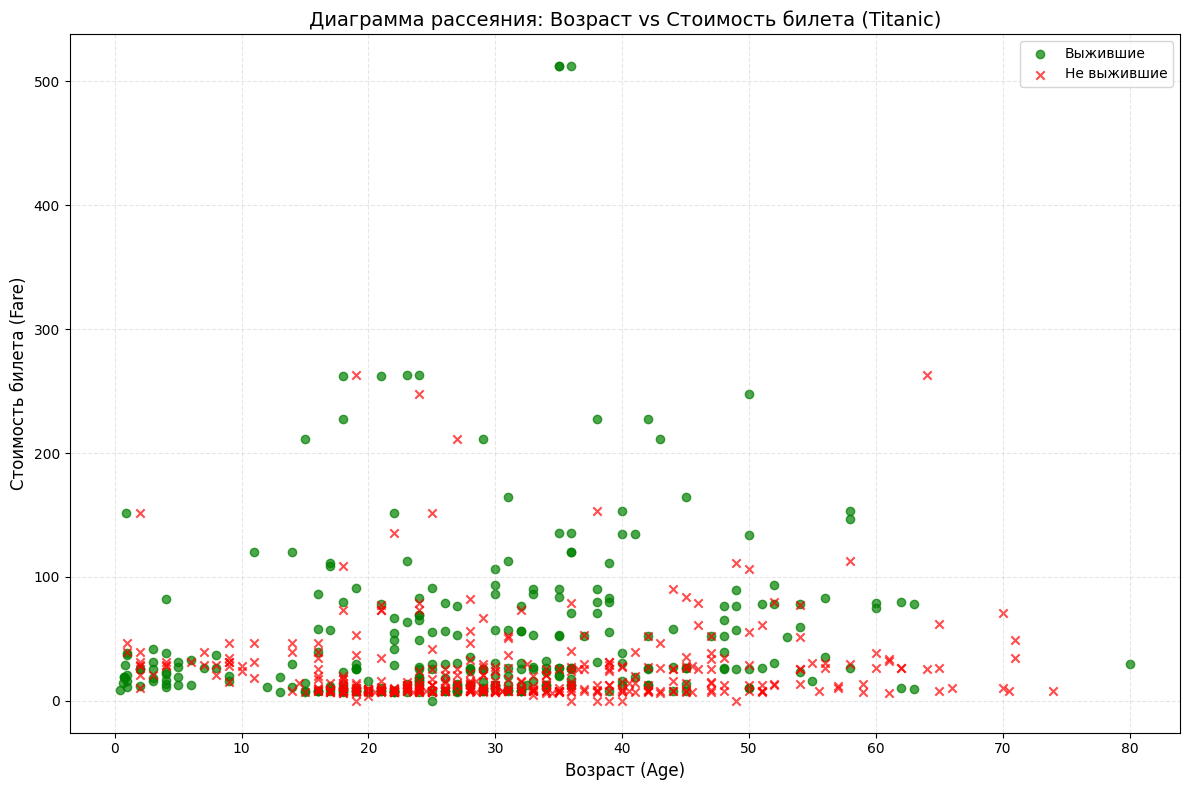

In [53]:
# Загрузка данных
df = pd.read_csv("sample_data/titanic1.csv")

# Исключаем строки с пропущенными значениями в Age или Fare
df_clean = df.dropna(subset=['Age', 'Fare'])

# Разделяем данные на выживших и не выживших
survived = df_clean[df_clean['Survived'] == 1]
not_survived = df_clean[df_clean['Survived'] == 0]

# Создаем график
plt.figure(figsize=(12, 8))

# Диаграмма рассеяния для выживших (зеленые круги)
plt.scatter(survived['Age'], survived['Fare'],
           marker='o', color='green', alpha=0.7,
           label='Выжившие')

# Диаграмма рассеяния для не выживших (красные кресты)
plt.scatter(not_survived['Age'], not_survived['Fare'],
           marker='x', color='red', alpha=0.7,
           label='Не выжившие')

# Настройка оформления
plt.xlabel('Возраст (Age)', fontsize=12)
plt.ylabel('Стоимость билета (Fare)', fontsize=12)
plt.title('Диаграмма рассеяния: Возраст vs Стоимость билета (Titanic)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)

# Показываем график
plt.tight_layout()
plt.show()

Задача **3**

Для первоначального анализа данных часто используются диаграммы рассеяния для всех признаков из набора данных. Это позволяет визуально увидеть зависимости между признаками и выбросы.
Для набора данных [iris](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) постройте на одном холсте 16 диаграмм рассеяния показывающих зависимости между всеми признаками набора ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)')

* Холст должен содержать 16 графиков на отдельных осях (см. иллюстрацию к статье в Википедия)
* Цвет маркеров должен зависеть от вида ирисов (iris.target)
* Графики должны иметь подписи к осям, легенду и общий заголовок

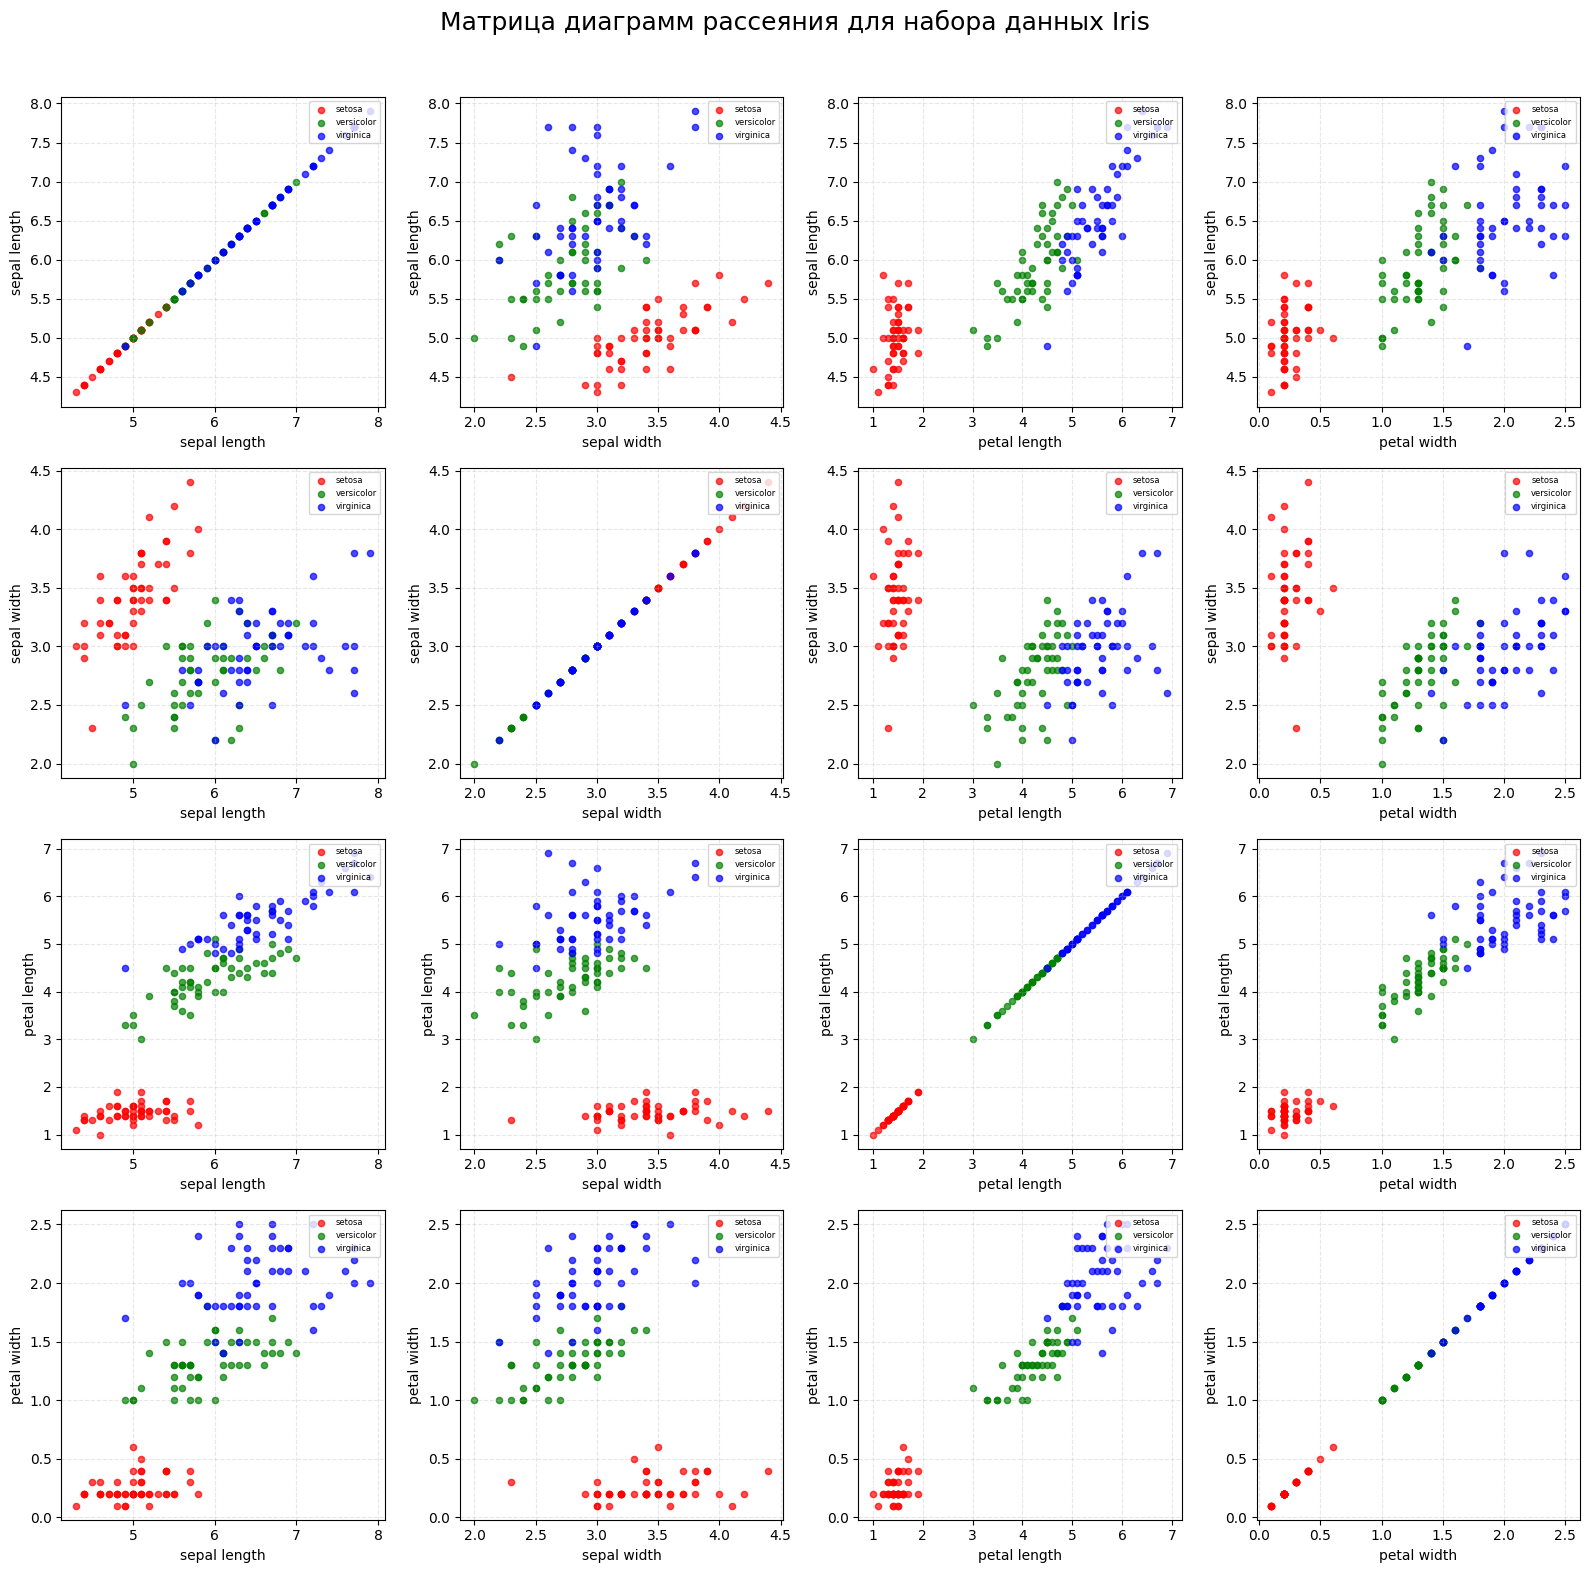

In [54]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных Iris
iris = load_iris()

# Получаем данные и метки
X = iris.data
y = iris.target
feature_names = [name.replace(' (cm)', '') for name in iris.feature_names]  # Упрощаем названия
target_names = iris.target_names

# Создаем фигуру и матрицу подграфиков 4x4
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# Добавляем общий заголовок над всеми матрицами ПЕРЕД построением графиков
fig.suptitle('Матрица диаграмм рассеяния для набора данных Iris', fontsize=18, y=0.98)

# Цвета для разных видов ирисов
colors = ['red', 'green', 'blue']

# Проходим по всем комбинациям признаков
for i in range(4):
    for j in range(4):
        ax = axes[i, j]

        # Для каждого вида ириса строим отдельный scatter plot
        for target in range(3):
            mask = (y == target)
            ax.scatter(X[mask, j], X[mask, i],
                      c=colors[target], label=target_names[target],
                      alpha=0.7, s=20)

        # Добавляем подписи осей для каждого графика
        ax.set_xlabel(feature_names[j], fontsize=10)
        ax.set_ylabel(feature_names[i], fontsize=10)

        # Добавляем легенду для каждого графика
        ax.legend(loc='upper right', fontsize=6)

        # Добавляем сетку для лучшей читаемости
        ax.grid(True, linestyle='--', alpha=0.3)

# Убираем лишние пробелы между графиками, оставляя место для заголовка
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Показываем график
plt.show()

Задача **4**

Постройте на одном холсте и разный осях следующие распределения для набора данных titanic (./data/titanic.csv):

* Постройте гистограмму распределения пассажиров по возрасту (Age). Интервал 5 лет.
* Постройте гистограмму распределения пассажиров женского пола по стоимости билетов (Fare). Подберите удобный интервал
* График должен иметь подписи к осям, легенду и заголовок

Данные для которых не указан возраст или стоимость билета должны быть исключены

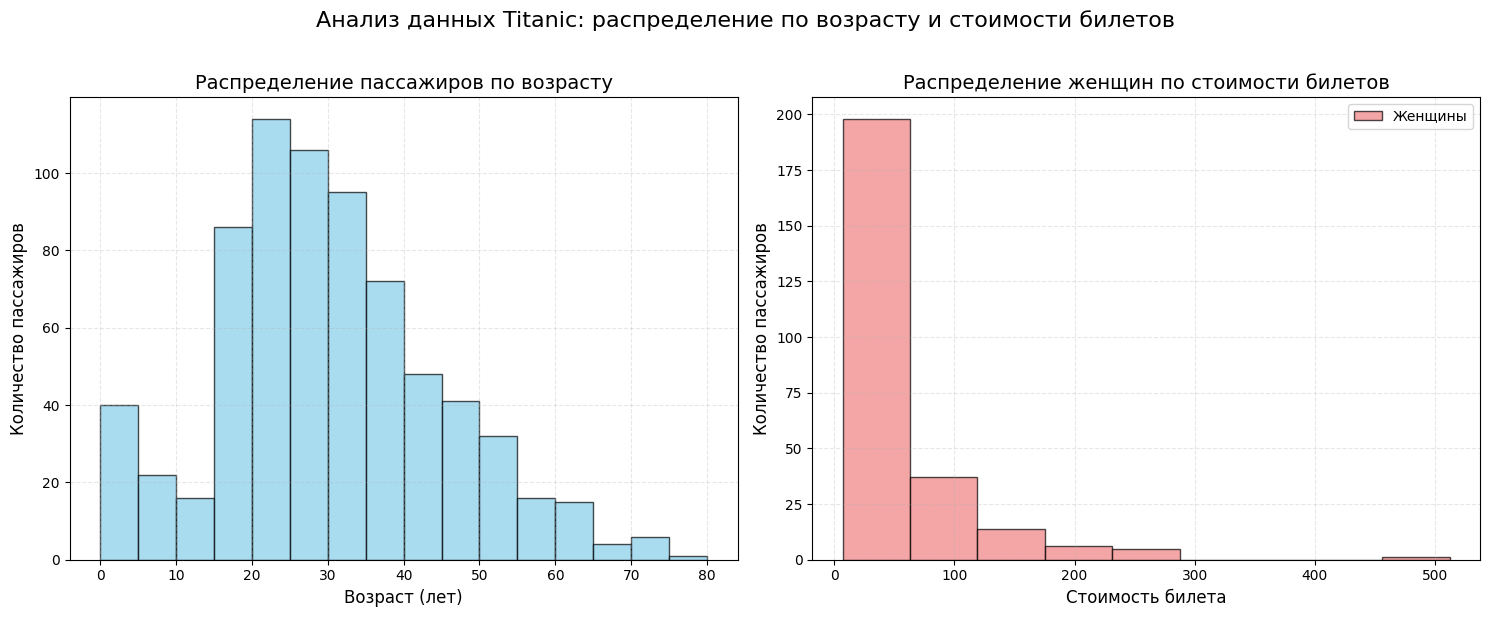

In [55]:
# Загрузка данных
df = pd.read_csv('sample_data/titanic1.csv')

# Исключаем строки с пропущенными значениями в Age или Fare
df_clean = df.dropna(subset=['Age', 'Fare'])

# Создаем фигуру с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Первый график: гистограмма распределения пассажиров по возрасту
ages = df_clean['Age']
bins_age = np.arange(0, ages.max() + 5, 5)  # Интервалы по 5 лет
ax1.hist(ages, bins=bins_age, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Возраст (лет)', fontsize=12)
ax1.set_ylabel('Количество пассажиров', fontsize=12)
ax1.set_title('Распределение пассажиров по возрасту', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.3)

# Второй график: гистограмма распределения женщин по стоимости билетов
women_fares = df_clean[df_clean['Sex'] == 'female']['Fare']
# Используем правило Стёрджеса для определения количества интервалов
n_bins = int(1 + np.log2(len(women_fares)))
ax2.hist(women_fares, bins=n_bins, color='lightcoral', edgecolor='black', alpha=0.7, label='Женщины')
ax2.set_xlabel('Стоимость билета', fontsize=12)
ax2.set_ylabel('Количество пассажиров', fontsize=12)
ax2.set_title('Распределение женщин по стоимости билетов', fontsize=14)
ax2.legend(fontsize=10)
ax2.grid(True, linestyle='--', alpha=0.3)

# Общий заголовок для всего холста
fig.suptitle('Анализ данных Titanic: распределение по возрасту и стоимости билетов', fontsize=16, y=1.02)

# Улучшаем компоновку
plt.tight_layout()

# Показываем графики
plt.show()

Задача **5**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - средняя стоимость за проезд для данного класса (Fare)
* График должен иметь подписи к осям, легенду и заголовок

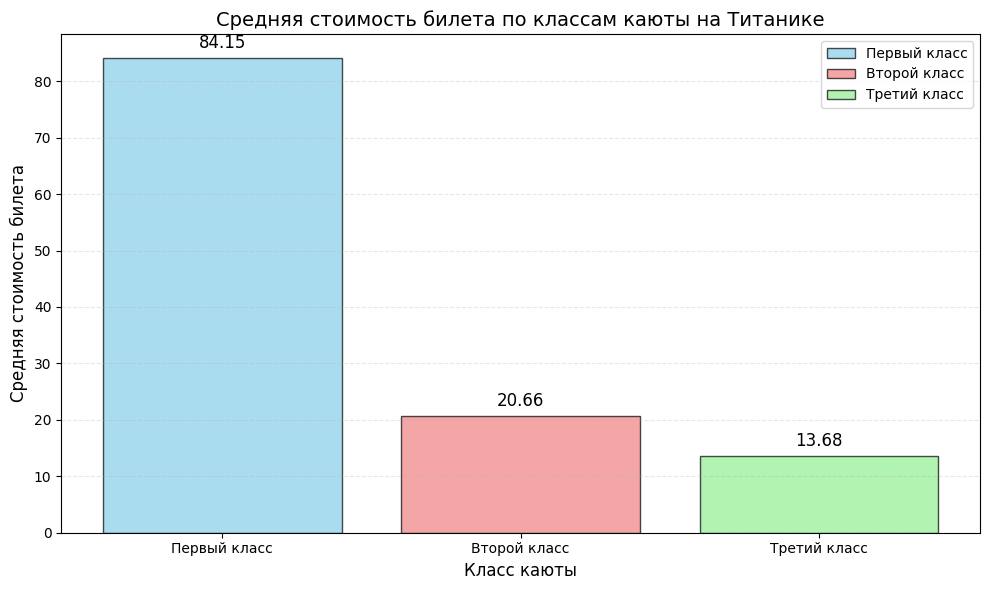

In [56]:
# Загрузка данных
df = pd.read_csv('sample_data/titanic1.csv')

# Удаляем строки с пропущенными значениями в Pclass или Fare
df_clean = df.dropna(subset=['Pclass', 'Fare'])

# Группируем по классу каюты и вычисляем среднюю стоимость билета
fare_by_class = df_clean.groupby('Pclass')['Fare'].mean()

# Создаем фигуру и оси
plt.figure(figsize=(10, 6))

# Создаем отдельные столбцы для каждого класса с соответствующими подписями в легенде
classes = [1, 2, 3]
colors = ['skyblue', 'lightcoral', 'lightgreen']
labels = ['Первый класс', 'Второй класс', 'Третий класс']

# Создаем столбчатую диаграмму с отдельными элементами для легенды
bars = []
for i, pclass in enumerate(classes):
    bar = plt.bar(pclass, fare_by_class[pclass],
                  color=colors[i], edgecolor='black', alpha=0.7,
                  label=labels[i])
    bars.append(bar[0])

# Добавляем подписи значений на столбцы
for i, pclass in enumerate(classes):
    height = fare_by_class[pclass]
    plt.text(pclass, height + 1, f'{height:.2f}',
             ha='center', va='bottom', fontsize=12)

# Настраиваем оси и оформление
plt.xlabel('Класс каюты', fontsize=12)
plt.ylabel('Средняя стоимость билета', fontsize=12)
plt.title('Средняя стоимость билета по классам каюты на Титанике', fontsize=14)
plt.xticks(classes, labels)

# Добавляем легенду с описанием для каждого класса
plt.legend(bars, labels, loc='upper right')

# Добавляем сетку для лучшей читаемости
plt.grid(True, axis='y', linestyle='--', alpha=0.3)

# Улучшаем компоновку
plt.tight_layout()

# Показываем график
plt.show()

Задача **6**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму c накоплением:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - количество пассажиров с разбивкой по полу (Sex)
* График должен иметь подписи к осям, легенду и заголовок

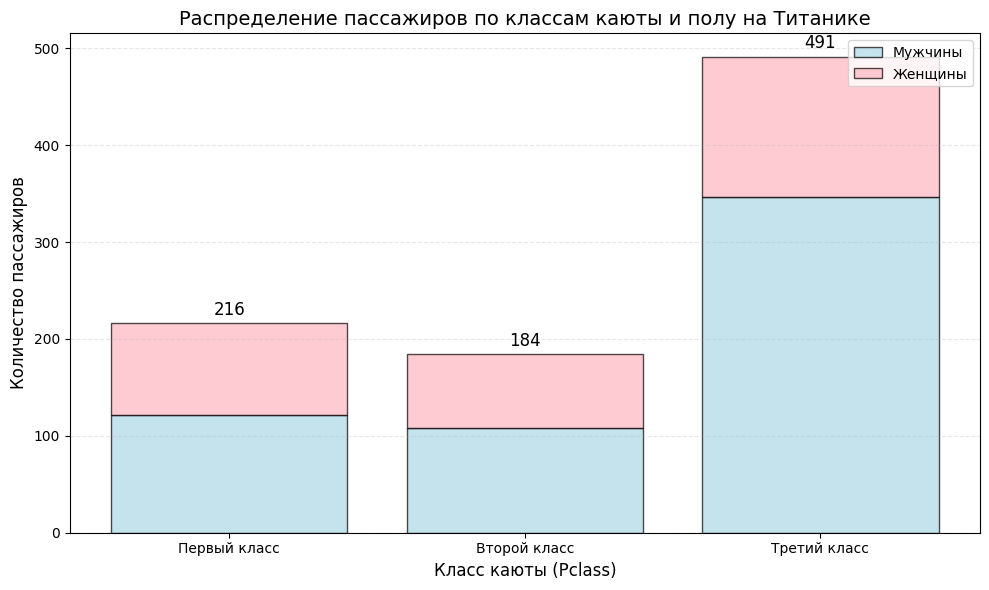

In [57]:
# Загрузка данных
df = pd.read_csv('sample_data/titanic1.csv')

# Удаляем строки с пропущенными значениями в Pclass или Sex
df_clean = df.dropna(subset=['Pclass', 'Sex'])

# Группируем по классу каюты и полу, подсчитываем количество пассажиров
passengers_by_class_sex = df_clean.groupby(['Pclass', 'Sex']).size().unstack()

# Создаем фигуру и оси
plt.figure(figsize=(10, 6))

# Создаем столбчатую диаграмму с накоплением
classes = [1, 2, 3]
male_counts = passengers_by_class_sex.loc[classes, 'male']
female_counts = passengers_by_class_sex.loc[classes, 'female']

# Строим столбцы для мужчин (нижняя часть)
bars_male = plt.bar(classes, male_counts, color='lightblue',
                    edgecolor='black', alpha=0.7, label='Мужчины')

# Строим столбцы для женщин поверх мужчин (верхняя часть)
bars_female = plt.bar(classes, female_counts, bottom=male_counts,
                      color='lightpink', edgecolor='black', alpha=0.7, label='Женщины')

# Добавляем подписи общих значений на столбцы
for i, (male, female) in enumerate(zip(male_counts, female_counts)):
    total = male + female
    plt.text(classes[i], total + 5, str(total),
             ha='center', va='bottom', fontsize=12)

# Настраиваем оси и оформление
plt.xlabel('Класс каюты (Pclass)', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.title('Распределение пассажиров по классам каюты и полу на Титанике', fontsize=14)
plt.xticks(classes, ['Первый класс', 'Второй класс', 'Третий класс'])

# Добавляем легенду
plt.legend(loc='upper right')

# Добавляем сетку для лучшей читаемости
plt.grid(True, axis='y', linestyle='--', alpha=0.3)

# Улучшаем компоновку
plt.tight_layout()

# Показываем график
plt.show()

Задача **7**

Для набора данных iris постройте круговую диаграмму

* Диаграмма должна иметь 3 сектора отражающих долю ирисов данного вида в наборе
* Сектор с максимальной долей долен быть выдвинут
* График должен иметь подписи к осям, легенду и заголовок

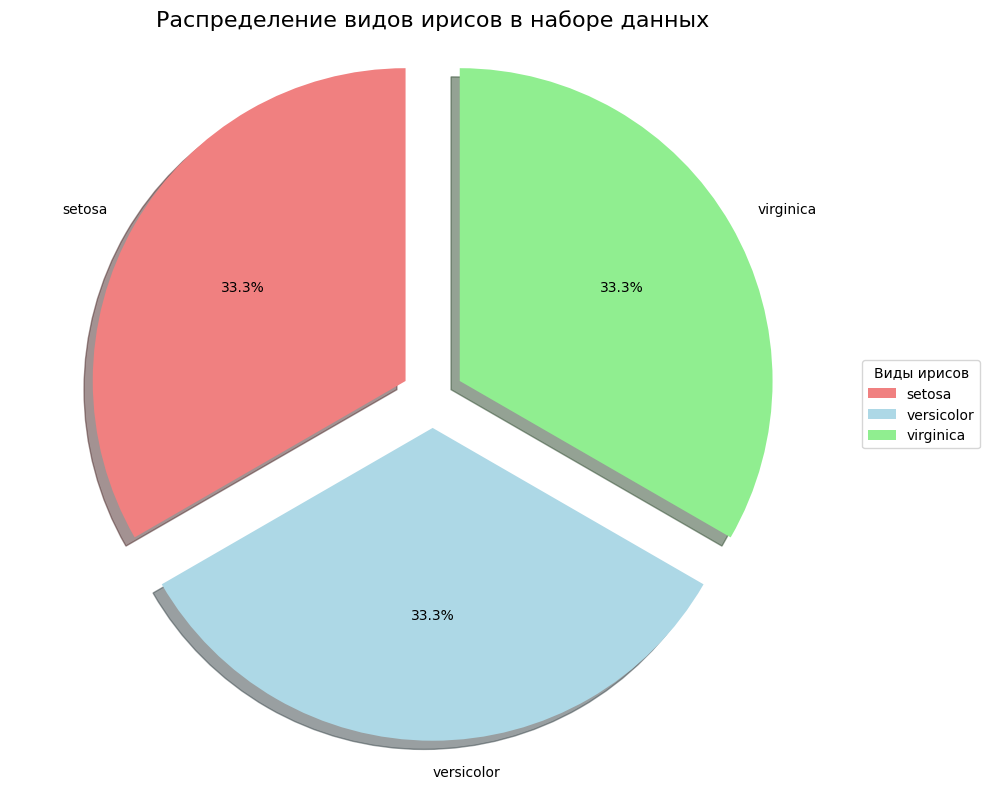

In [58]:
from sklearn.datasets import load_iris
iris = load_iris()
target_names = iris.target_names
target_counts = pd.Series(iris.target).value_counts().sort_index()

# Создаем фигуру и оси
plt.figure(figsize=(10, 8))

# Определяем выдвижение сектора с максимальной долей
explode = [0.1 if count == max(target_counts) else 0 for count in target_counts]

# Строим круговую диаграмму
colors = ['lightcoral', 'lightblue', 'lightgreen']
plt.pie(target_counts,
        labels=target_names,
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,
        colors=colors,
        shadow=True)

# Добавляем заголовок
plt.title('Распределение видов ирисов в наборе данных', fontsize=16)

# Добавляем легенду
plt.legend(target_names, title="Виды ирисов", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Обеспечиваем равные пропорции, чтобы круг был круглым
plt.axis('equal')

plt.tight_layout()
plt.show()

Задача **8**

Использую библиотеку [Seaborn](https://seaborn.pydata.org/) постройте гистограмму для возраста пассажиров "Титаника"

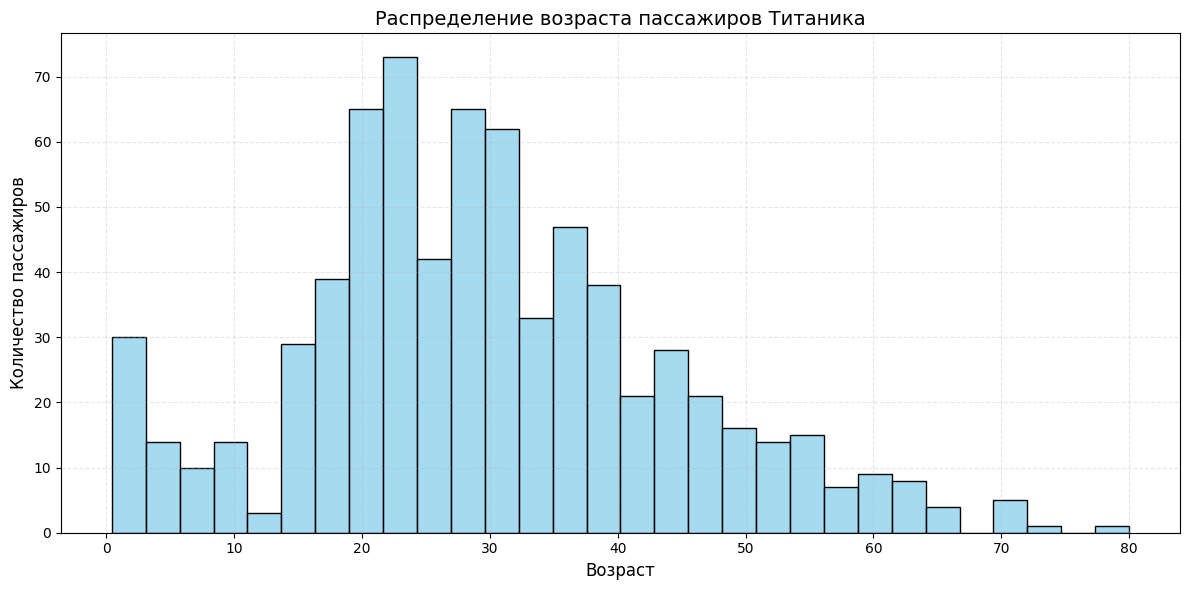

In [59]:
import seaborn as sns
# Загрузка данных
df = pd.read_csv('sample_data/titanic1.csv')

# Удаляем строки с пропущенными значениями в Age
df_clean = df.dropna(subset=['Age'])

plt.figure(figsize=(12, 6))
# Строим гистограмму с помощью Seaborn
sns.histplot(data=df_clean, x='Age', bins=30, kde=False, color='skyblue')

plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.title('Распределение возраста пассажиров Титаника', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Вопросы


1. Для чего используется диаграмма рассеяния?
2. Что такое гистограмма, чем он отличается от столбчатой диаграммы?
3. Как задать цвет линии в линейном графике Matplotlib?
4. Чем класс plt.Figure отличается от объекта  plt.Axes?
5. Matplotlib не позволяет управлять типом маркера scatter графика. Да или нет?
6. Matplotlib единственная библиотека для построения графиков в Python. Да или нет?
7. Matplotlib не позволяет сохранить график в виде файла, нужно делать скриншот?
8. В наборе данных iris представлены 4 вида ирисов. Да или нет?
9. Для всех пассажиров "Титаника" указан возраст. Да или нет?
10. Как на одном холсте может располагаться не более 16 диаграмм, это обусловлено тем что размер диаграммы нельзя изменить и более мелкие графики попросту не будут видны.